CAR DETAILS FROM CAR DEKHO

In [1]:
import numpy as np
import pandas as pd

Импорт библиотек для анализа данных

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Импорт библиотек для графической визуализации данных

In [3]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


Загружаем CSV-файл с данными

In [4]:
print("Размер датасета:", df.shape)
#Размер данных

df.columns.tolist()
#Название столбцов

df.info()
#Информация о типах данных

Размер датасета: (4340, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Получаем информацию о размере данных, названиях столбцов и типах данных

In [5]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Получаем описательную статистику по числовым признакам

In [6]:
df.isnull().sum()
#Проверка пропущенных значений

df = df.dropna()
#Обработка, если есть пропуски

df.dtypes
#Проверка типов данных

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

Проверка наличия пропуска и корректности данных

In [7]:
df['car_age'] = 2025 - df["year"]

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,18
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,18
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,13
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,8
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,11


Признак возраста автомобиля

In [8]:
print(df['selling_price'].mean(), " - Средняя цена")

print(df['selling_price'].median(), " - Медианная цена продажи")

print(df['selling_price'].min(), " - Минимальная цена")

print(df['selling_price'].max(), " - Максимальная цена")

504127.3117511521  - Средняя цена
350000.0  - Медианная цена продажи
20000  - Минимальная цена
8900000  - Максимальная цена


Анализ цен на автомабили

In [9]:
df['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

Топ-5 самых популярных типов топлива

In [10]:
print(df.groupby('seller_type') ['selling_price'].mean())

seller_type
Dealer              721822.890342
Individual          424505.419236
Trustmark Dealer    914950.980392
Name: selling_price, dtype: float64


Анализируем, отличается ли цена в зависимости от типа продавца

In [11]:
print(df.groupby('transmission')[['selling_price', 'km_driven']].mean())

              selling_price     km_driven
transmission                             
Automatic      1.408154e+06  49688.803571
Manual         4.000667e+05  68118.162898


Сравниваем автоматическую трансмисию и механическую

In [12]:
print(df['owner'].value_counts())

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Распределение автомобилей по количеству предыдущих владельцев

In [13]:
price_std = np.std(df['selling_price'])
print(price_std)
#Вычисление стандартного отклонения цены

correlation = np.corrcoef(df['year'], df['selling_price'])[0, 1]
print(correlation)

578482.0792187806
0.4139216798108547


Использование Numpy для статистических вычислений

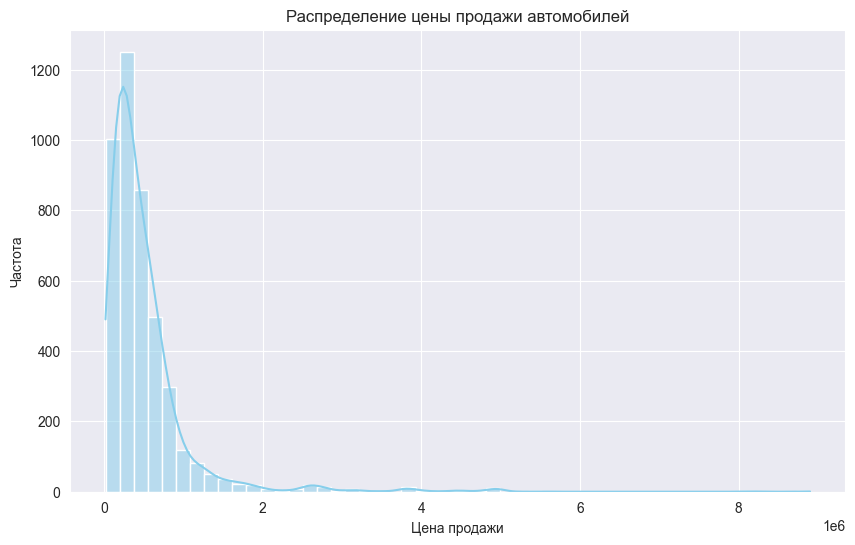

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=50, kde=True, color='skyblue')

plt.title('Распределение цены продажи автомобилей')
plt.xlabel('Цена продажи')
plt.ylabel('Частота')

plt.show()

График показывает распределение цен на автомобили

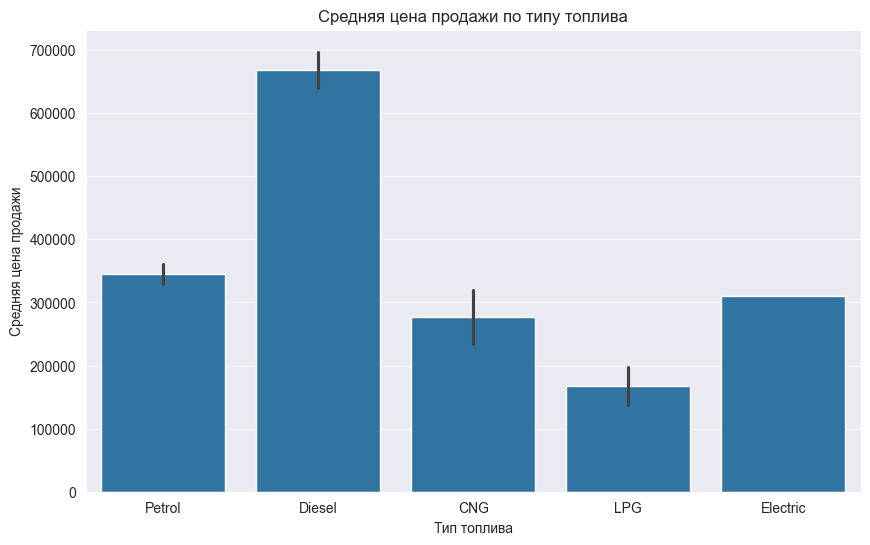

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel', y='selling_price', data=df, estimator=np.mean)

plt.title("Средняя цена продажи по типу топлива")
plt.xlabel("Тип топлива")
plt.ylabel("Средняя цена продажи")
plt.show()

Сравнение цен в зависимости от типа топлива

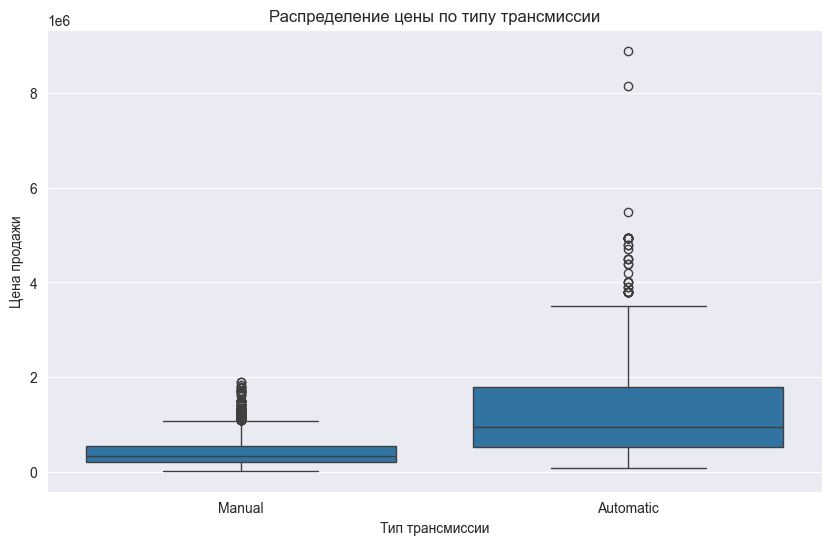

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='selling_price', data=df)

plt.title("Распределение цены по типу трансмиссии")
plt.xlabel("Тип трансмиссии")
plt.ylabel("Цена продажи")
plt.show()

Показывает медиану, квратиль и выбросы

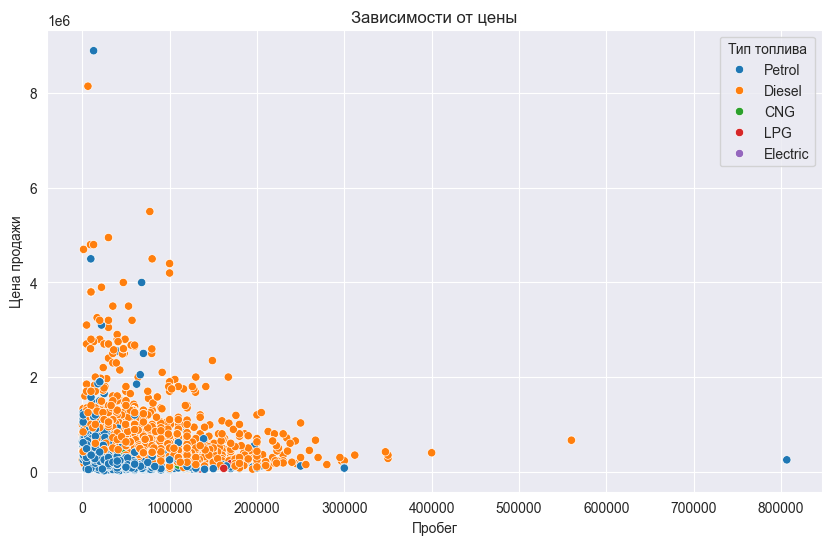

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', hue='fuel', data=df)

plt.title("Зависимости от цены")
plt.xlabel("Пробег")
plt.ylabel("Цена продажи")
plt.legend(title="Тип топлива")

plt.show()

Зависимость цены от пробега с разделением по типу топлива

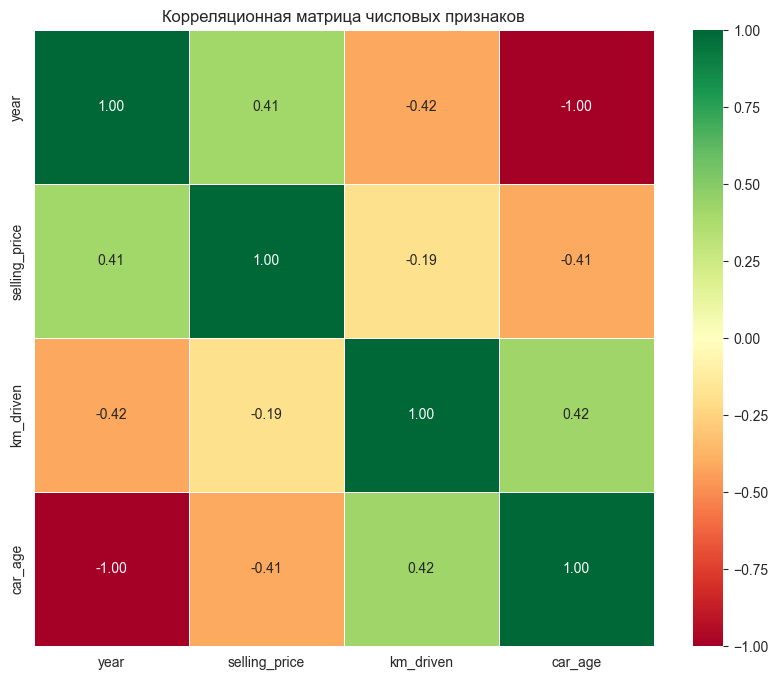

In [18]:
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt='.2f', center=0, linewidths=0.5)
plt.title("Корреляционная матрица числовых признаков")
plt.show()

Взаимосвязь между числовыми переменными

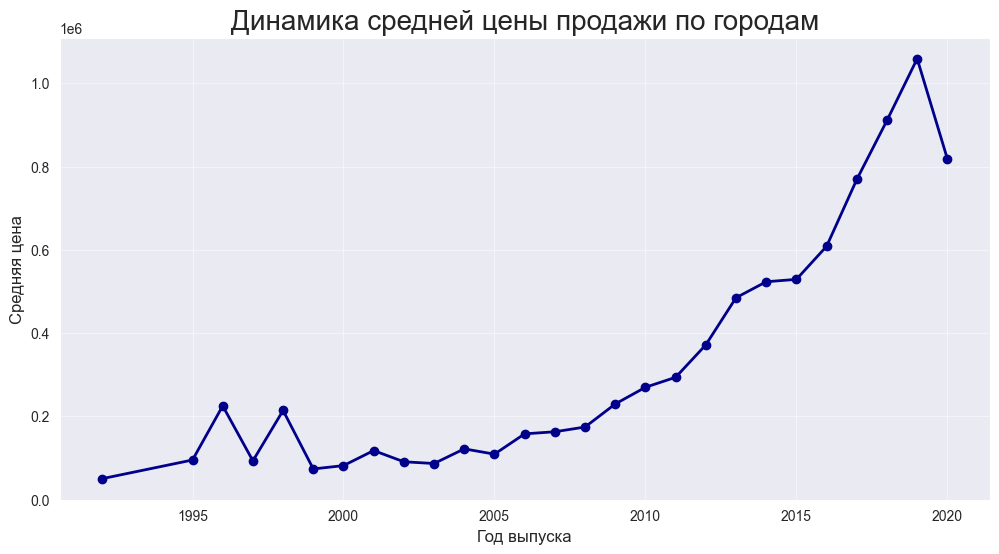

In [19]:
plt.figure(figsize=(12, 6))
df.groupby('year')['selling_price'].mean().plot(kind='line', marker='o', color='darkblue', linewidth=2)

plt.title("Динамика средней цены продажи по городам", fontsize=20)
plt.xlabel("Год выпуска", fontsize=12)
plt.ylabel("Средняя цена", fontsize=12)
plt.grid(True, alpha=0.5)

plt.show()

Линейный график с изменённым дизайном